In [1]:
import sys
import os
sys.path.append('/g/data/jk72/ll6859/access_aero_eval/')
from aercode import *
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import xarray as xr
import glob as gb
import cartopy.crs as ccrs
import seaborn as sns
import scipy.special
import datetime as dt

import dask
import warnings

In [2]:
from dask.distributed import Client
client = Client()  # set up local cluster
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41723,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:40111,Total threads: 2
Dashboard: /proxy/33787/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:33953,


In [3]:
dask.config.set(**{'array.slicing.split_large_chunks': True});

In [4]:
plt.style.use('default')
warnings.filterwarnings('ignore')

## RVInvestigator

In [3]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/RVInvestigator/'
uw = keycutter(f_path+'rvigaw_cn10_2016to2019_L2.csv', 'datetime', 'latitude', 'longitude')
uw = uw.dropna()

bx400

In [4]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [5]:
# merge the aerosol and meteorology data together
rvi_track = xr.merge([aertrack,mettrack])

rvi_track = rvi_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
rvi_track['time'] = rvi_track.indexes['time'].normalize()

In [6]:
rvi_track.load().to_netcdf(path=f_path+'rvi1619_bx400_track.nc')

cg283

In [7]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [8]:
# merge the aerosol and meteorology data together
rvi_track = xr.merge([aertrack,mettrack])

rvi_track = rvi_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate, invert datetime order
rvi_track['time'] = rvi_track.indexes['time'].normalize()
rvi_track['time'] = rvi_track['time'][::-1]

In [9]:
rvi_track.load().to_netcdf(path='/g/data/jk72/ll6859/rvi1619_cg283_track.nc')

# Cold Water Trial

In [10]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/ColdWaterTrial/'
uw = keycutter(f_path+'CWT_ProcessedAerosolData_1min.csv', 'date', 'lat', 'lon')
uw = uw.dropna()

bx400

In [11]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [12]:
# merge the aerosol and meteorology data together
cwt_track = xr.merge([aertrack,mettrack])

cwt_track = cwt_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cwt_track['time'] = cwt_track.indexes['time'].normalize()

In [13]:
cwt_track.load().to_netcdf(path=f_path+'cwt15_bx400_track.nc')

cg283

In [14]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [15]:
# merge the aerosol and meteorology data together
cwt_track = xr.merge([aertrack,mettrack])

cwt_track = cwt_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cwt_track['time'] = cwt_track.indexes['time'].normalize()

In [16]:
cwt_track.load().to_netcdf(path=f_path+'cwt15_cg283_track.nc')

# Reef 2 Rainforest

In [17]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/Reef2Rain/'
uw = keycutter(f_path+'R2R_RV_aerosol.csv', 'date', 'lat', 'lon')
uw = uw.dropna()

bx400

In [18]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [19]:
# merge the aerosol and meteorology data together
r2r_track = xr.merge([aertrack,mettrack])

r2r_track = r2r_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
r2r_track['time'] = r2r_track.indexes['time'].normalize()

In [20]:
r2r_track.load().to_netcdf(path=f_path+'r2r16_bx400_track.nc')

cg283

In [21]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [22]:
# merge the aerosol and meteorology data together
r2r_track = xr.merge([aertrack,mettrack])

r2r_track = r2r_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
r2r_track['time'] = r2r_track.indexes['time'].normalize()

In [23]:
r2r_track.load().to_netcdf(path=f_path+'r2r16_cg283_track.nc')

# Ice 2 Equator

In [24]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/Ice2Equator/'
uw = keycutter(f_path+'I2E_ProcessedAerosolData_1min.csv', 'date', 'lat', 'lon')
uw = uw.dropna()

In [9]:
f_path = '/g/data/jk72/ll6859/access_aero_eval/data/'
uw = pd.read_csv(f_path+'aerosol - Ice2Equator - daily means from hrly data.csv', index_col='date')
uw.index.names = ['time']
uw['time'] = pd.DatetimeIndex(uw.index)
uw.index = uw['time'].astype('datetime64[ns]')
uw = uw[['lat','lon']]

In [11]:
uw['lon'] = uw.lon % 360

In [12]:
uw

,lat,lon
time,,
2016-04-27,-47.877749,151.378404
2016-04-28,-50.156411,153.299807
2016-04-29,-53.869242,156.549457
2016-04-30,-57.302396,161.376896
2016-05-01,-60.686691,167.635290
2016-05-02,-63.352734,174.915020
2016-05-03,-64.851399,214.350881
2016-05-04,-66.295639,189.544086
2016-05-05,-65.186019,189.972271


In [8]:
i2e_bx400 = xr.open_dataset('/g/data/jk72/ll6859/access_aero_eval/output/i2e16_bx400_track.nc')
i2e_bx400

<xarray.Dataset>
Dimensions:           (time: 24, z1_hybrid_height: 1)
Coordinates:
  * time              (time) datetime64[ns] 2016-05-20 2016-05-19 ... 2016-04-27
  * z1_hybrid_height  (z1_hybrid_height) float64 20.0
Data variables:
    lat               (time, z1_hybrid_height) float64 ...
    lon               (time, z1_hybrid_height) float64 ...
    N3                (time, z1_hybrid_height) float64 ...
    N10               (time, z1_hybrid_height) float64 ...
    CCN40             (time, z1_hybrid_height) float64 ...
    CCN50             (time, z1_hybrid_height) float64 ...
    CCN60             (time, z1_hybrid_height) float64 ...
    uas               (time, z1_hybrid_height) float64 ...
    vas               (time, z1_hybrid_height) float64 ...
    psl               (time, z1_hybrid_height) float64 ...
    pr                (time, z1_hybrid_height) float64 ...
    tempk             (time, z1_hybrid_height) float64 ...
Attributes:
    history:  /scratch/jk72/slf563/cylc-run/u-bx400/share/data/History_Data/b...

bx400

In [25]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [26]:
# merge the aerosol and meteorology data together
i2e_track = xr.merge([aertrack,mettrack])

i2e_track = i2e_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
i2e_track['time'] = i2e_track.indexes['time'].normalize()

In [27]:
i2e_track.load().to_netcdf(path=f_path+'i2e16_bx400_track.nc')

cg283

In [28]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [29]:
# merge the aerosol and meteorology data together
i2e_track = xr.merge([aertrack,mettrack])

i2e_track = i2e_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
i2e_track['time'] = i2e_track.indexes['time'].normalize()

In [30]:
i2e_track.load().to_netcdf(path=f_path+'i2e16_cg283_track.nc')

# CAPRICORN I

In [11]:
f_path = '/g/data/jk72/ll6859/access_aero_eval/Capricorn/'
uw = pd.read_csv(f_path+'in2016_v02uwy10sec.csv', parse_dates=[['date', 'time']], index_col='date_time',usecols=['date','time','latitude(degree_north)','longitude(degree_east)'])
uw = uw.resample('1D').mean()
uw.columns = ['lat','lon']

bx400

In [32]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw
aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw
mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [33]:
# merge the aerosol and meteorology data together
cap1_track = xr.merge([aertrack,mettrack])

cap1_track = cap1_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cap1_track['time'] = cap1_track.indexes['time'].normalize()

In [34]:
cap1_track.load().to_netcdf(path=f_path+'cap16_bx400_track.nc')

cg283

In [35]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw
aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw
mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [36]:
# merge the aerosol and meteorology data together
cap1_track = xr.merge([aertrack,mettrack])

cap1_track = cap1_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cap1_track['time'] = cap1_track.indexes['time'].normalize()

In [37]:
cap1_track.load().to_netcdf(path=f_path+'cap16_cg283_track.nc')

# CAPRICORN II

In [6]:
uw = pd.read_csv(f_path+'in2018_v01uwy10sec.csv', parse_dates=[['date', 'time']], index_col='date_time')
for v in uw.select_dtypes('object'):
    uw[v] = pd.to_numeric(uw[v], errors='coerce')
uw.index.name = 'time'
uw = uw.resample('1D').mean()
uw = uw[['latitude(degree_north)','longitude(degree_east)']]
uw.rename(columns = {"latitude(degree_north)": "lat",
                            "longitude(degree_east)": "lon"}, inplace=True)

bx400

In [8]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw
aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw
mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [9]:
# merge the aerosol and meteorology data together
cap2_track = xr.merge([aertrack,mettrack])

cap2_track = cap2_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cap2_track['time'] = cap2_track.indexes['time'].normalize()

In [10]:
cap2_track.load().to_netcdf(path=f_path+'cap18_bx400_track.nc')

cg283

In [11]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw
aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw
mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [12]:
# merge the aerosol and meteorology data together
cap2_track = xr.merge([aertrack,mettrack])

cap2_track = cap2_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cap2_track['time'] = cap2_track.indexes['time'].normalize()

In [13]:
cap2_track.load().to_netcdf(path=f_path+'cap18_cg283_track.nc')

# MARCUS

In [45]:
# pull out location of ship
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/marcus_uw/'
voyages = sorted(gb.glob(f_path+'201718_Voyage*.csv'))
uw = pd.concat([pd.read_csv(v) for v in voyages ])
uw = uw.set_index(pd.to_datetime(uw['date_time_utc']))
uw = uw[['latitude','longitude']]
uw = uw.resample('1D', kind='Date').mean().ffill()
uw.columns = ['lat','lon']

bx400

In [46]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [47]:
# merge the aerosol and meteorology data together
marcus_track = xr.merge([aertrack,mettrack])

marcus_track = marcus_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
marcus_track['time'] = marcus_track.indexes['time'].normalize()

In [48]:
marcus_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/aa1718_bx400_track.nc')

cg283

In [49]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [50]:
# merge the aerosol and meteorology data together
marcus_track = xr.merge([aertrack,mettrack])

marcus_track = marcus_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
marcus_track['time'] = marcus_track.indexes['time'].normalize()

In [51]:
marcus_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/aa1718_cg283_track.nc')

# CAMMPCAN

In [52]:
# pull out location of ship
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/cammpcan_uw/'
voyages = sorted(gb.glob(f_path+'201819_Voyage*.csv'))
uw = pd.concat([pd.read_csv(v) for v in voyages ])
uw = uw.set_index(pd.to_datetime(uw['date_time_utc']))
uw = uw[['latitude','longitude']]
uw = uw.resample('1D', kind='Date').mean().ffill()
uw.columns = ['lat','lon']

bx400

In [53]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [54]:
# merge the aerosol and meteorology data together
cammpcan_track = xr.merge([aertrack,mettrack])

cammpcan_track = cammpcan_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cammpcan_track['time'] = cammpcan_track.indexes['time'].normalize()

In [55]:
cammpcan_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/aa1819_bx400_track.nc')

cg283

In [56]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [57]:
# merge the aerosol and meteorology data together
cammpcan_track = xr.merge([aertrack,mettrack])

cammpcan_track = cammpcan_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cammpcan_track['time'] = cammpcan_track.indexes['time'].normalize()

In [58]:
cammpcan_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/AuroraAustralis/aa1819_cg283_track.nc')

# TAN1802

In [59]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/TAN1802/'
uw = keycutter(f_path+'weather.csv', 'Time (UTC)', 'Latitude', 'Longitude')
uw = uw.dropna()

bx400

In [60]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [61]:
# merge the aerosol and meteorology data together
tan_track = xr.merge([aertrack,mettrack])

tan_track = tan_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
tan_track['time'] = tan_track.indexes['time'].normalize()

In [62]:
tan_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/TAN1802/tan1718_bx400_track.nc')

cg283

In [63]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [64]:
# merge the aerosol and meteorology data together
tan_track = xr.merge([aertrack,mettrack])

tan_track = tan_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
tan_track['time'] = tan_track.indexes['time'].normalize()

In [65]:
tan_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/TAN1802/tan1718_cg283_track.nc')

# Macquarie Island

In [66]:
f_path = '/g/data/jk72/ll6859/ACCESS_aero_eval/MQI/'
uw = pd.read_hdf(f_path+'ACRE_CN10_1H_FINAL.h5')
uw = uw.resample('1D', kind='date_time').mean()
uw['lat'] = -54.38
uw['lon'] = 158.4
uw = uw[['lat','lon']]

bx400

In [67]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [68]:
# merge the aerosol and meteorology data together
mqi_track = xr.merge([aertrack,mettrack])

mqi_track = mqi_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
mqi_track['time'] = mqi_track.indexes['time'].normalize()

In [69]:
mqi_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/MQI/mqi1618_bx400_track.nc')

cg283

In [70]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [71]:
# merge the aerosol and meteorology data together
mqi_track = xr.merge([aertrack,mettrack])

mqi_track = mqi_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
mqi_track['time'] = mqi_track.indexes['time'].normalize()

In [72]:
mqi_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/MQI/mqi1618_cg283_track.nc')

# Cape Grim

In [15]:
f_path='/g/data/jk72/ll6859/access_aero_eval/CGO/'
uw = pd.read_excel(f_path+'cgbpaps_CN  2016-2018.xlsx', index_col='date')
uw = uw.resample('1D', kind='date_time').mean()
uw['lat'] = -40.68333
uw['lon'] = 144.6833
uw = uw[['lat','lon']]

bx400

In [74]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [75]:
# merge the aerosol and meteorology data together
cgo_track = xr.merge([aertrack,mettrack])

cgo_track = cgo_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cgo_track['time'] = cgo_track.indexes['time'].normalize()

In [76]:
cgo_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/CGO/cgo1618_bx400_track.nc')

cg283

In [5]:
# extract aerosol data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.sh'
key = uw

aertrack = df_md(key, m_path, mod, dt)

# extract meteorology data
m_path = '/g/data/jk72/slf563/ACCESS/output/cg283/daily/'
mod = 'cg283a'
dt = 'pd.glob'
key = uw

mettrack = df_md(key, m_path, mod, dt)

# calculate air density from temperature
mettrack = calc_density(mettrack)

# convert aerosol units
aertrack = aero_unit_conversions(aertrack, mettrack)

# select data at 20m
aertrack = aertrack.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
mettrack = mettrack.drop('z0_hybrid_height')

# calculate aerosol number concentrations
aertrack = nt_calcs(aertrack)

# calculate CCN number concentrations
aertrack = ccn_calcs(aertrack)

In [6]:
# merge the aerosol and meteorology data together
cgo_track = xr.merge([aertrack,mettrack])

cgo_track = cgo_track[['lat','lon','N3','N10','CCN40','CCN50','CCN60','uas','vas','psl','pr','tempk']]

# remove time component from datetime coordinate
cgo_track['time'] = cgo_track.indexes['time'].normalize()

In [7]:
cgo_track.load().to_netcdf(path='/g/data/jk72/ll6859/ACCESS_aero_eval/CGO/cgo1618_cg283_track.nc')

Syowa

In [66]:
xr.open_dataset('/g/data/jk72/ll6859/access_aero_eval/output/syw1618_bx400_track.nc')

<xarray.Dataset>
Dimensions:           (time: 366, z1_hybrid_height: 1)
Coordinates:
  * time              (time) datetime64[ns] 2016-12-31 2016-12-30 ... 2016-01-01
  * z1_hybrid_height  (z1_hybrid_height) float64 20.0
Data variables:
    lat               (time, z1_hybrid_height) float64 ...
    lon               (time, z1_hybrid_height) float64 ...
    N3                (time, z1_hybrid_height) float64 ...
    N10               (time, z1_hybrid_height) float64 ...
    CCN40             (time, z1_hybrid_height) float64 ...
    CCN50             (time, z1_hybrid_height) float64 ...
    CCN60             (time, z1_hybrid_height) float64 ...
    uas               (time, z1_hybrid_height) float64 ...
    vas               (time, z1_hybrid_height) float64 ...
    psl               (time, z1_hybrid_height) float64 ...
    pr                (time, z1_hybrid_height) float64 ...
    tempk             (time, z1_hybrid_height) float64 ...
Attributes:
    history:  /scratch/jk72/slf563/cylc-run/u-bx400/share/data/History_Data/b...

In [67]:
def df_md(key, m_path, mod, dt):
    """Uses position data to extract model data for that position.
    
    Args:
      key (Dataframe): must contain 'time', 'lat', and 'lon' data columns. See keycutter function.
      m_path (str): filepath for the model data.
      mod (str): name of the model run identifier.
      dt (str): type of data, either paer, pche or pmet.
    
    Returns a data array containing model data set by 'dt'.
    """

    dftrack = None  # Initialize dftrack
        
    for t in key.index: # loop to pull out model data on ship track
        m_df = m_path + mod + '.' + dt + '{}{:02d}{:02d}.nc'.format(t.year, t.month, t.day)
        
        if os.path.exists(m_df):
            try:
                df = xr.open_mfdataset(m_df)
                shplat = key['lat'].loc[t]
                shplon = key['lon'].loc[t]
                data = df.interp(lat=shplat, lon=shplon, lat_v=shplat, lon_u=shplon)
                data = data.reset_coords(('lat', 'lon', 'lat_v', 'lon_u'))
                data['lat'] = data.lat.expand_dims(dim='time')
                data['lon'] = data.lon.expand_dims(dim='time')
                data['lat_v'] = data.lat_v.expand_dims(dim='time')
                data['lon_u'] = data.lon_u.expand_dims(dim='time')        

                if dftrack is None:
                    dftrack = data
                else:
                    dftrack = xr.concat([data, dftrack], dim='time')

            except Exception as e:
                print(f"Error for time {t}: {str(e)}")
                # You can log the error or take other appropriate actions here

    return dftrack

In [85]:
f_path='/g/data/jk72/slf563/OBS/campaigns/cleaned_SO_campaign_data/'
uw = pd.read_csv(f_path+'aerosol - Syowa - daily means from hrly data.csv', index_col='Date time UT')
uw.index.names = ['time']
uw['time'] = pd.DatetimeIndex(uw.index)
uw.index = uw['time'].astype('datetime64[ns]')
uw['lat'] = -69.0
uw['lon'] = 39.0
uw = uw[['lat','lon']]

In [86]:
uw = uw.loc['2016']
uw

,lat,lon
time,,
2016-01-01,-69.0,39.0
2016-01-02,-69.0,39.0
2016-01-03,-69.0,39.0
2016-01-04,-69.0,39.0
2016-01-05,-69.0,39.0
...,...,...
2016-12-27,-69.0,39.0
2016-12-28,-69.0,39.0
2016-12-29,-69.0,39.0


In [87]:
m_path = '/g/data/jk72/slf563/ACCESS/output/bx400/daily/'
mod = 'bx400a'
aer_dt = 'pd.sh'
met_dt = 'pd.glob'
key = uw[-10:]

In [88]:
aer = df_md(key, m_path, mod, aer_dt)

In [89]:
met = df_md(key, m_path, mod, met_dt)

In [90]:
met = calc_density(met)

In [91]:
aer = aero_unit_conversions(aer, met)

In [92]:
aer = aer.isel(z1_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
met = met.isel(z1_hybrid_height=0, z0_hybrid_height=0).expand_dims('z1_hybrid_height').transpose()
met = met.drop('z0_hybrid_height')

In [93]:
aer = nt_calcs(aer)

In [94]:
aer

<xarray.Dataset>
Dimensions:           (time: 10, z1_hybrid_height: 1, z_pseudo3: 6)
Coordinates:
  * time              (time) datetime64[ns] 2016-12-31T12:00:00 ... 2016-12-2...
  * z1_hybrid_height  (z1_hybrid_height) float64 20.0
  * z_pseudo3         (z_pseudo3) float64 1.0 2.0 3.0 4.0 5.0 6.0
Data variables: (12/114)
    field38319        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    field38401        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    field38402        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    field38403        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    field38404        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    field38405        (time, z1_hybrid_height) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                ...
    lat               (time, z1_hybrid_height) float64 -69.0 -69.0 ... -69.0
    lon               (time, z1_hybrid_height) float64 39.0 39.0 ... 39.0 39.0
    lat_v             (time, z1_hybrid_height) float64 -69.0 -69.0 ... -69.0
    lon_u             (time, z1_hybrid_height) float64 39.0 39.0 ... 39.0 39.0
    N10               (time, z1_hybrid_height) float64 94.68 92.99 ... 127.6
    N3                (time, z1_hybrid_height) float64 95.11 94.07 ... 128.1
Attributes:
    history:  /scratch/jk72/slf563/cylc-run/u-bx400/share/data/History_Data/b...

In [95]:
aer.field38438.values

array([[27.56455177],
       [27.64699295],
       [40.97722271],
       [43.14070425],
       [32.3559169 ],
       [17.32040661],
       [17.116697  ],
       [29.63309042],
       [31.65099567],
       [41.93829586]])

In [79]:
raw_model = xr.open_dataset('/g/data/jk72/slf563/ACCESS/output/bx400/daily/bx400a.pd.sh20161230.nc')

In [80]:
raw_model

<xarray.Dataset>
Dimensions:           (time: 1, lat: 73, lat_v: 74, lon: 192, lon_u: 192,
                       z1_hybrid_height: 85, z_pseudo3: 6)
Coordinates:
  * time              (time) datetime64[ns] 2016-12-30T12:00:00
  * lat               (lat) float64 -89.38 -88.12 -86.88 ... -1.875 -0.625 0.625
  * lat_v             (lat_v) float64 -90.0 -88.75 -87.5 ... -1.25 0.0 1.25
  * lon               (lon) float64 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * lon_u             (lon_u) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * z1_hybrid_height  (z1_hybrid_height) float64 20.0 53.33 ... 7.91e+04 8.5e+04
  * z_pseudo3         (z_pseudo3) float64 1.0 2.0 3.0 4.0 5.0 6.0
Data variables: (12/108)
    field38319        (time, z1_hybrid_height, lat, lon) float32 ...
    field38401        (time, z1_hybrid_height, lat, lon) float32 ...
    field38402        (time, z1_hybrid_height, lat, lon) float32 ...
    field38403        (time, z1_hybrid_height, lat, lon) float32 ...
    field38404        (time, z1_hybrid_height, lat, lon) float32 ...
    field38405        (time, z1_hybrid_height, lat, lon) float32 ...
    ...                ...
    field38520        (time, lat, lon) float32 ...
    field38525        (time, lat, lon) float32 ...
    field38531        (time, lat, lon) float32 ...
    field38536        (time, lat, lon) float32 ...
    field38539        (time, lat, lon) float32 ...
    field50214        (time, lat, lon) float32 ...
Attributes:
    history:  /scratch/jk72/slf563/cylc-run/u-bx400/share/data/History_Data/b...

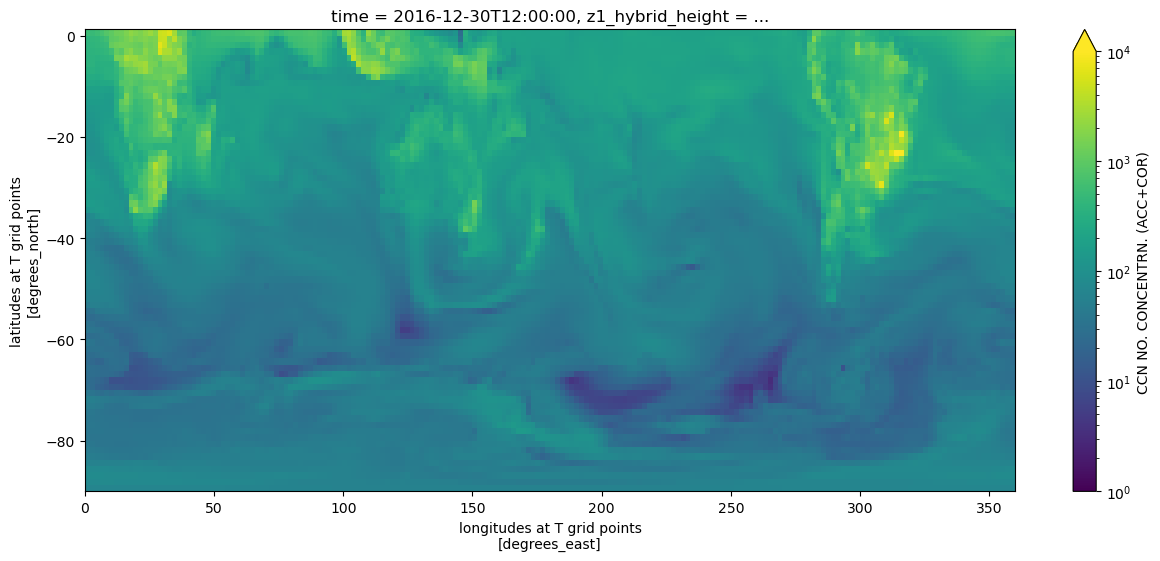

In [81]:
ax = plt.subplot(111,)
ax.figure.set_size_inches(15, 6)
raw_model.isel(z1_hybrid_height=0).field38438.plot(norm=matplotlib.colors.LogNorm(vmin=1,vmax=10000))

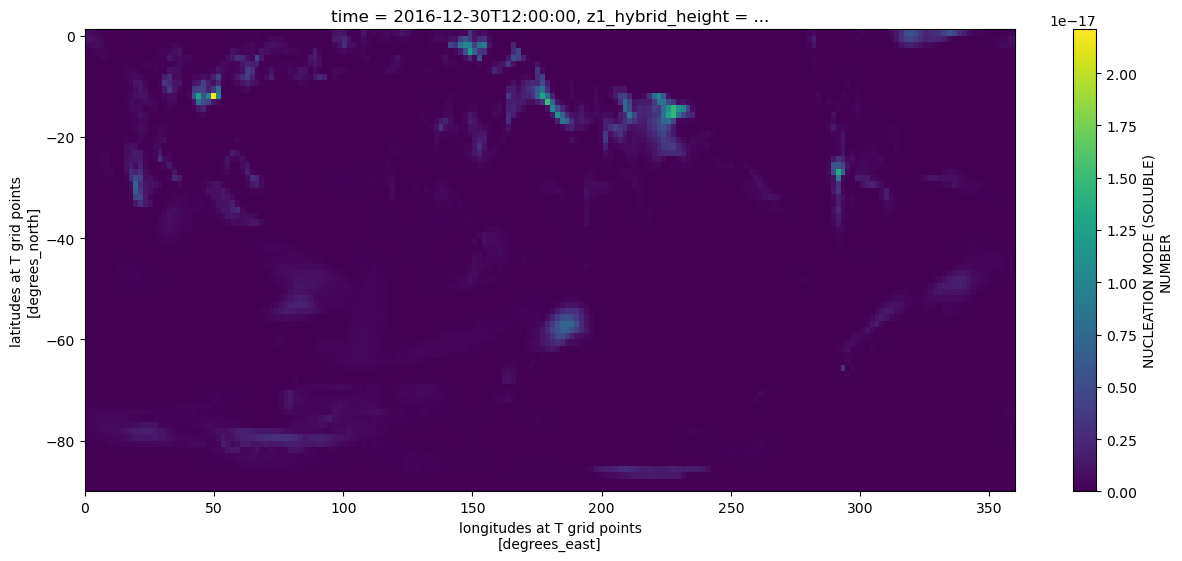

In [82]:
ax = plt.subplot(111,)
ax.figure.set_size_inches(15, 6)
raw_model.isel(z1_hybrid_height=0).field34101.plot()

In [83]:
raw_met = xr.open_dataset('/g/data/jk72/slf563/ACCESS/output/bx400/daily/bx400a.pd.glob20161230.nc')

In [84]:
raw_met

<xarray.Dataset>
Dimensions:           (lat: 144, lat_v: 145, lon_u: 192, lon: 192, time: 1,
                       z0_hybrid_height: 85, z1_hybrid_height: 85)
Coordinates:
  * lat               (lat) float64 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lat_v             (lat_v) float64 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * lon_u             (lon_u) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * lon               (lon) float64 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * time              (time) datetime64[ns] 2016-12-30T12:00:00
  * z0_hybrid_height  (z0_hybrid_height) float64 10.0 36.67 ... 8.205e+04
  * z1_hybrid_height  (z1_hybrid_height) float64 20.0 53.33 ... 7.91e+04 8.5e+04
Data variables: (12/40)
    ua                (time, z0_hybrid_height, lat, lon_u) float32 ...
    va                (time, z0_hybrid_height, lat_v, lon) float32 ...
    theta             (time, z1_hybrid_height, lat, lon) float32 ...
    hus               (time, z1_hybrid_height, lat, lon) float32 ...
    field12           (time, z1_hybrid_height, lat, lon) float32 ...
    bldepth           (time, lat, lon) float32 ...
    ...                ...
    field9204         (time, lat, lon) float32 ...
    field9205         (time, lat, lon) float32 ...
    psl               (time, lat, lon) float32 ...
    lwp               (time, lat, lon) float32 ...
    clivi             (time, lat, lon) float32 ...
    field30461        (time, lat, lon) float32 ...
Attributes:
    history:  /scratch/jk72/slf563/cylc-run/u-bx400/share/data/History_Data/b...